In [32]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [33]:
import numpy as np
import math

import time
import itertools as itertools

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.cm as cm

14.309049367904663


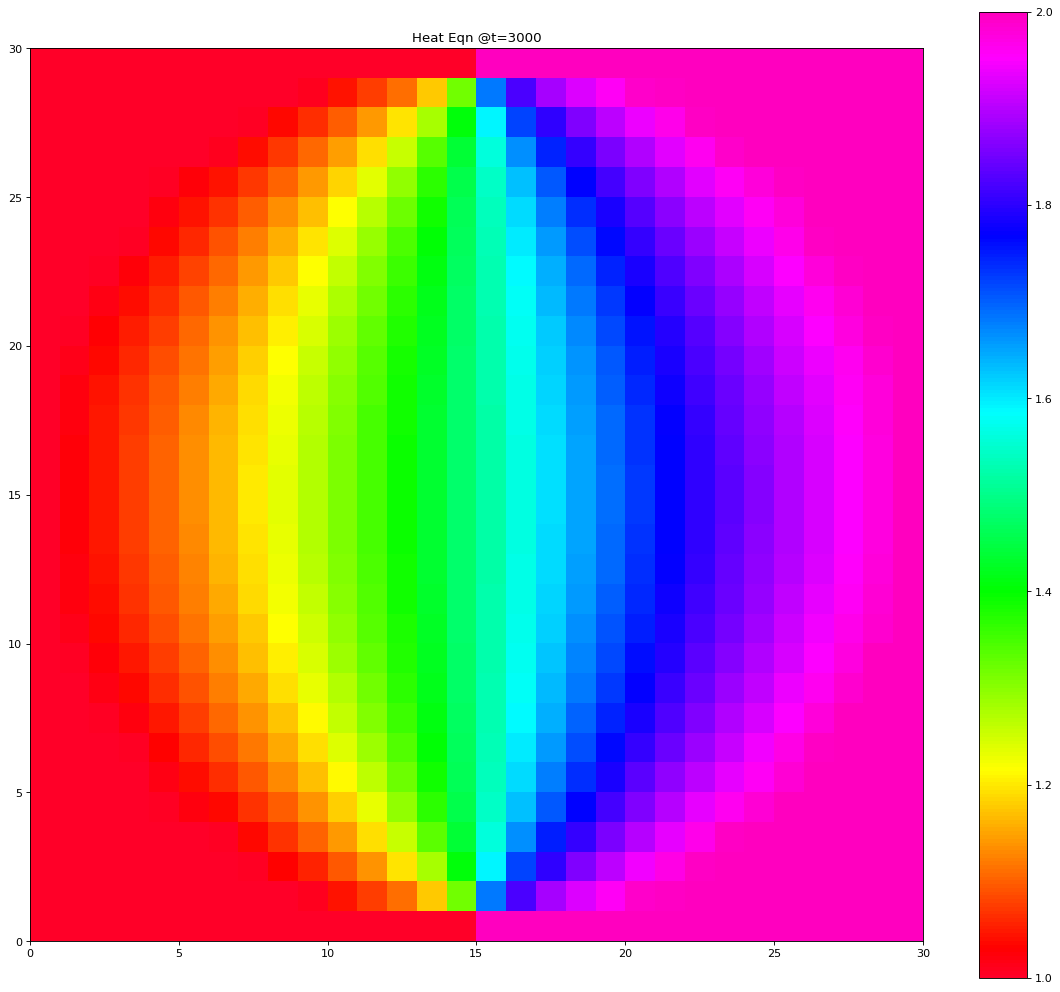

In [43]:
#starting time
t = time.time()

L = 30
H = 30
u = np.zeros((L,H))
Lu = np.zeros((L,H))

c1 = math.floor(L/2)
c2 = math.floor(H/2)
r2 = math.floor((L/2)**2)


dx= 1
dy= 1
dt=.1
gamma = 1

iteration = 0
while (iteration<3000):
    iteration = iteration + 1
    
    #Circular BCs
    #must be careful because python is zero indexed
    for i in range (0,c2):
        for j in range (0,c1):
            if((i-c2)**2 +(j-c1)**2 >= r2):    # top left
                u[i,j] = 1
                
    for i in range (0,L):
        for j in range (c1,L):
            if((i-c2)**2 +(j+1-c1)**2 >= r2):    # top right
                u[i,j] = 2
                
    for i in range (c2,H):
        for j in range (c1,L):
            if((i+1-c2)**2 +(j+1-c1)**2 >= r2):    # bottom right
                u[i,j] = 2
    
    for i in range (c2,H):
        for j in range (0,c1):
            if((i+1-c2)**2 +(j-c1)**2 >= r2):    # bottom left
                u[i,j] = 1

    #OPTION 1, B:  Use a 5-point stencil
    
    for i in range (1,L-1):
        
        for j in range (1,H-1):
            d2ud2x = (((u[i+1,j]-u[i,j])/dx) - ((u[i,j]-u[i-1,j])/dx))/dx
            d2ud2y = (((u[i,j+1]-u[i,j])/dy) - ((u[i,j]-u[i,j-1])/dy))/dy
            
            lap = gamma*dt*(d2ud2x + d2ud2y)
            
            u[i,j] = u[i,j] + lap
            

#calculate time elapse
elapse = time.time() - t
print(elapse)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(u, extent=(0, L, 0, H),interpolation='nearest',cmap=cm.gist_rainbow)

plt.title('Heat Eqn @t={}'.format(iteration))
plt.colorbar()
plt.show()

plt.close('all')

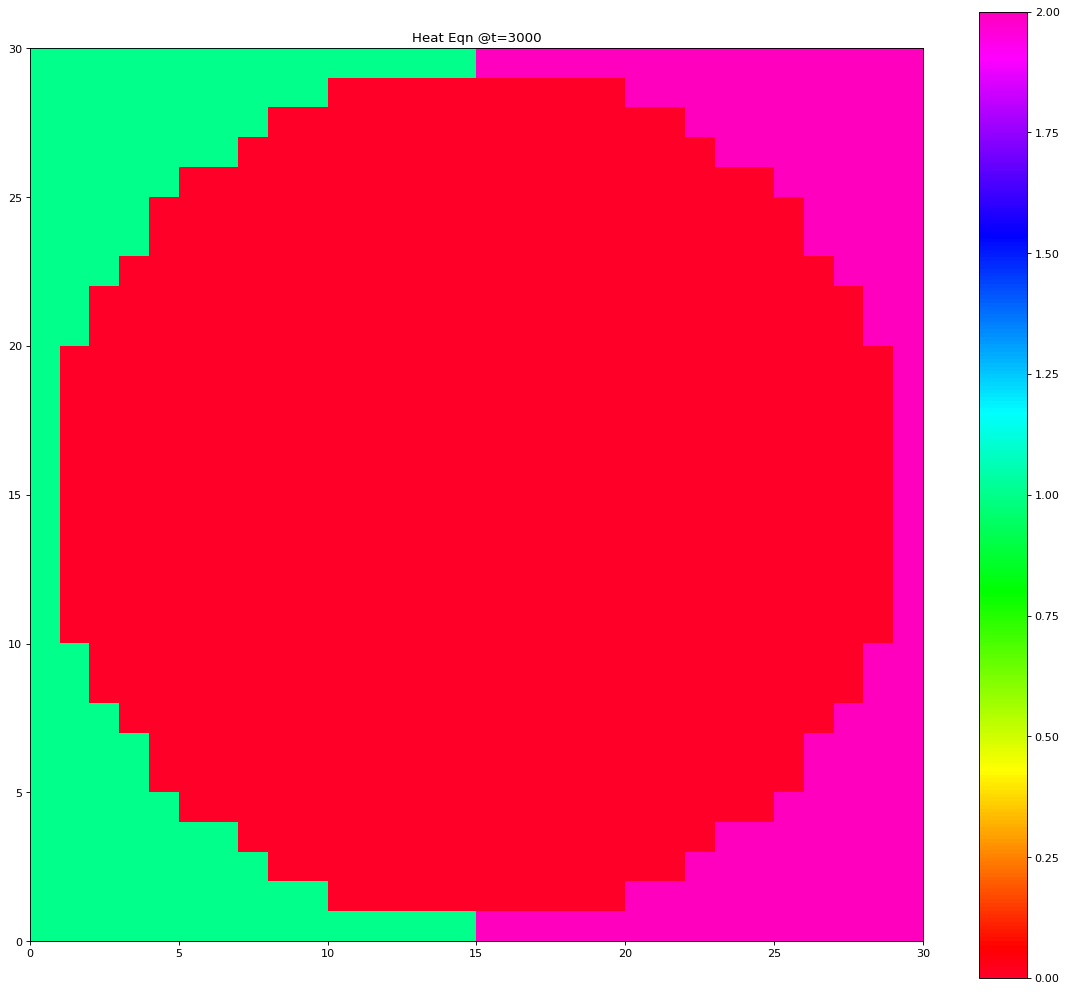

In [44]:
#starting time
t = time.time()

L = 30
H = 30
u = np.zeros((L,H))
IC  = np.zeros((L,H))
Lu = np.zeros((L,H))

c1 = math.floor(L/2)
c2 = math.floor(H/2)
r2 = math.floor((L/2)**2)


dx= 1
dy= 1
dt=.1
gamma = 1

#Calculate initial condition matrix
x1 = range(0,c2,1)
x2 = range(0,c1,1)
x3 = range(0,L,1)
x4 = range(c1,L,1)
x5 = range(c2,H,1)
x6 = range(c1,L,1)
x7 = range(0,L,1)
x8 = range(0,H,1)
x9 = range(0,L-1,1)
x10 = range(0,H-1,1)

for i, j in itertools.product(x1, x2):
    if((i-c2)**2 +(j-c1)**2 >= r2):    # top left
        IC[i,j] = 1

for i, j in itertools.product(x3, x4):
    if((i-c2)**2 +(j+1-c1)**2 >= r2):    # top right
        IC[i,j] = 2

for i, j in itertools.product(x5, x6):
    if((i+1-c2)**2 +(j+1-c1)**2 >= r2):    # bottom right
        IC[i,j] = 2

for i, j in itertools.product(x5, x2):
    if((i+1-c2)**2 +(j-c1)**2 >= r2):    # bottom left
        IC[i,j] = 1

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(IC, extent=(0, L, 0, H),interpolation='nearest',cmap=cm.gist_rainbow)

plt.title('Heat Eqn @t={}'.format(iteration))
plt.colorbar()
plt.show()

plt.close('all')

C:\Users\sspie\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
C:\Users\sspie\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
C:\Users\sspie\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


129.60947561264038


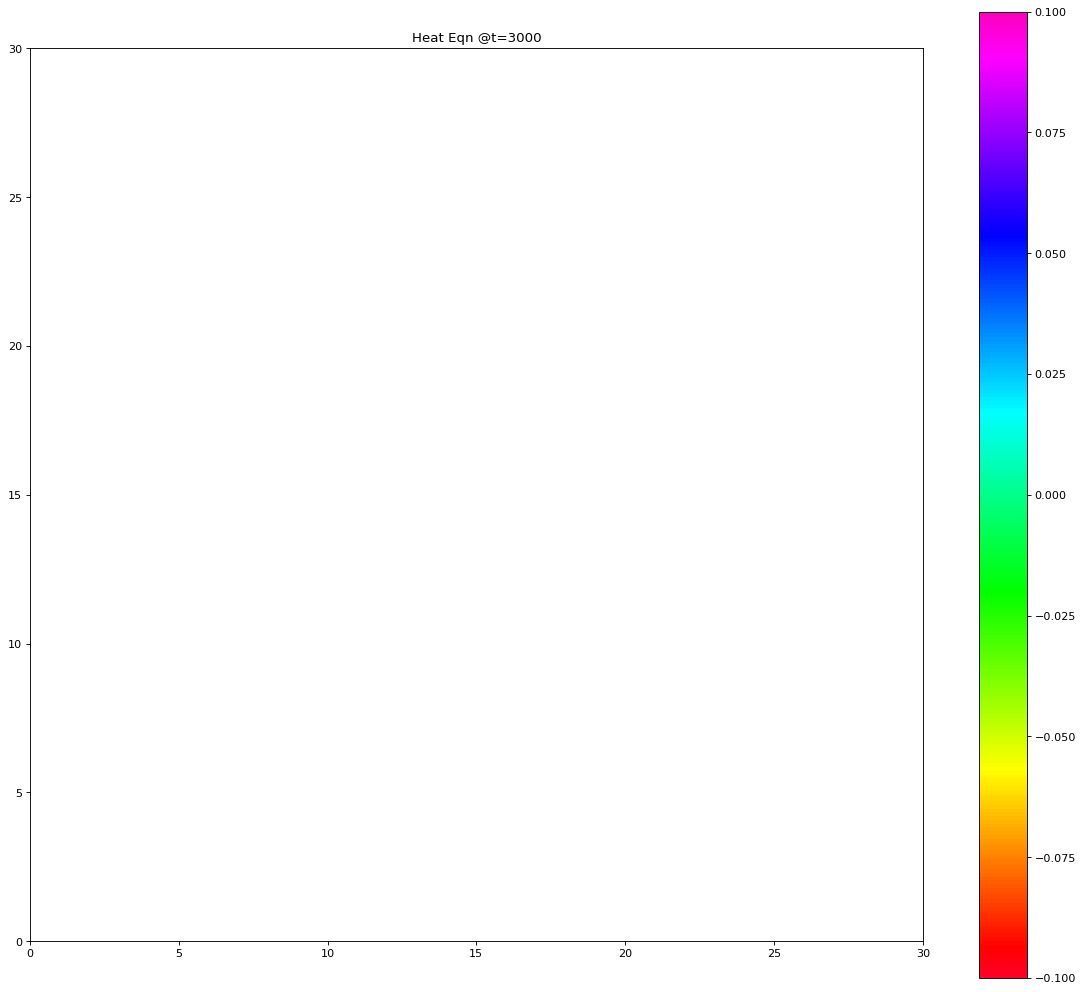

In [47]:
iteration = 0
while (iteration<3000):
    iteration = iteration + 1

    #Compare IC matrix with values and replace non-zero values.  
    for i, j in itertools.product(x7, x8):
        if IC[i,j] != 0:
            u[i,j] = IC[i,j]

        d2ud2x = (((u[i,j-1]-u[i-1,j-1])/dx) - ((u[i-1,j-1]-u[i,j-1])/dx))/dx
        d2ud2y = (((u[i-1,j]-u[i-1,j-1])/dy) - ((u[i-1,j-1]-u[i-1,j])/dy))/dy

        lap = gamma*dt*(d2ud2x + d2ud2y)

        u[i,j] = u[i,j] + lap
            

#calculate time elapse
elapse = time.time() - t
print(elapse)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(u, extent=(0, L, 0, H),interpolation='nearest',cmap=cm.gist_rainbow)

plt.title('Heat Eqn @t={}'.format(iteration))
plt.colorbar()
plt.show()

plt.close('all')